https://medium.com/python-in-plain-english/from-api-to-pandas-getting-json-data-with-python-df127f699b6b

## Importing

In [120]:
import requests
import json
import pandas as pd
# to handle  data retrieval
import urllib3
from urllib3 import request
# to handle certificate verification
import certifi
# uncomment below if installation needed (not necessary in Colab)
!pip install certifi

In [121]:
import psycopg2
from psycopg2 import Error
import pprint
import matplotlib.pyplot as plt

In [122]:
pd.set_option('display.max_columns', None)

## SQL Queries

In [123]:
public_dataset_table_drop = 'DROP TABLE IF EXISTS public_dataset'

In [124]:
public_dataset_table_create = ("""
    CREATE TABLE IF NOT EXISTS public_dataset(
                                            categoria INTEGER, \
                                            cbo2002_ocupacao INTEGER, \
                                            competencia INTEGER, \
                                            fonte INTEGER, \
                                            grau_de_instrucao INTEGER, \
                                            horas_contratuais INTEGER, \
                                            id INTEGER PRIMARY KEY NOT NULL, \
                                            idade INTEGER, \
                                            ind_trab_intermitente INTEGER, \
                                            ind_trab_parcial INTEGER,  \
                                            indicador_aprendiz INTEGER, \
                                            municipio INTEGER, \
                                            raca_cor INTEGER, \
                                            regiao INTEGER, \
                                            salario DECIMAL, \
                                            saldo_movimentacao INTEGER, \
                                            secao TEXT, \
                                            sexo INTEGER, \
                                            subclasse INTEGER, \
                                            tam_estab_jan INTEGER, \
                                            tipo_de_deficiencia INTEGER, \
                                            tipo_empregador INTEGER, \
                                            tipo_estabelecimento INTEGER, \
                                            tipo_movimentacao INTEGER, \
                                            uf INTEGER \
    )
""")

In [125]:
public_dataset_table_insert = ("""
    INSERT INTO public_dataset(
                            categoria, \
                            cbo2002_ocupacao, \
                            competencia, \
                            fonte, \
                            grau_de_instrucao, \
                            horas_contratuais, \
                            id, \
                            idade, \
                            ind_trab_intermitente, \
                            ind_trab_parcial,  \
                            indicador_aprendiz, \
                            municipio, \
                            raca_cor, \
                            regiao, \
                            salario, \
                            saldo_movimentacao, \
                            secao, \
                            sexo, \
                            subclasse, \
                            tam_estab_jan, \
                            tipo_de_deficiencia, \
                            tipo_empregador, \
                            tipo_estabelecimento, \
                            tipo_movimentacao, \
                            uf)
    VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)
""")

## Get data from API

In [126]:
http = urllib3.PoolManager(
       cert_reqs='CERT_REQUIRED',
       ca_certs=certifi.where())

In [127]:
url = 'http://dataeng.quero.com:5000/caged-data'

In [128]:
r = http.request('GET', url)

In [129]:
r.status

200

In [130]:
data = json.loads(r.data.decode('utf-8'))

In [131]:
# in this dataset, the data to extract is under 'features'
df = pd.json_normalize(data, 'caged')
df.head(10)

,categoria,cbo2002_ocupacao,competencia,fonte,grau_de_instrucao,horas_contratuais,id,idade,ind_trab_intermitente,ind_trab_parcial,indicador_aprendiz,municipio,raca_cor,regiao,salario,saldo_movimentacao,secao,sexo,subclasse,tam_estab_jan,tipo_de_deficiencia,tipo_empregador,tipo_estabelecimento,tipo_movimentacao,uf
0,101,422310,202006,1,7,36,2,18,0,0,0,355030,1,3,998,-1,N,3,8220200,7,0,0,1,40,35
1,101,521110,202006,1,7,44,3,22,0,0,0,520995,6,5,0,1,G,3,4753900,3,0,0,1,20,52
2,101,783225,202006,1,7,44,11,34,0,0,0,260890,1,2,1045,-1,C,1,2222600,2,0,0,1,31,26
3,101,848520,202006,1,4,44,12,26,0,0,0,432250,1,4,1332.880004882813,-1,C,1,1013901,6,0,0,1,43,43
4,101,521135,202006,1,6,44,13,20,0,0,0,421450,6,4,1211,-1,G,1,4520001,3,0,0,1,43,42
5,106,322205,202006,1,7,44,14,25,0,0,0,261160,1,2,1137.910034179688,-1,N,1,7820500,6,0,0,1,43,26
6,101,421125,202006,1,7,44,15,27,0,0,0,431440,2,4,1348.900024414063,-1,G,3,4711302,9,0,0,1,31,43
7,101,521115,202006,1,7,36,16,33,0,0,0,355250,6,3,1396.910034179688,-1,G,3,4752100,3,0,0,1,40,35
8,101,521110,202006,1,7,44,17,35,0,0,0,317020,6,3,643.3499755859375,1,G,1,4754703,6,0,0,1,20,31
9,101,322205,202006,1,7,36,18,35,0,0,0,350920,1,3,2113.280029296875,1,Q,1,8660700,7,0,0,1,20,35


In [132]:
type(df)

pandas.core.frame.DataFrame

In [93]:
df['salario'] = df['salario'].str.replace(',', '')

In [94]:
df['categoria'] = df['categoria'].astype('int')
df['cbo2002_ocupacao'] = df['cbo2002_ocupacao'].astype('int')
df['competencia'] = df['competencia'].astype('int')
df['fonte'] = df['fonte'].astype('int')
df['grau_de_instrucao'] = df['grau_de_instrucao'].astype('int')
df['horas_contratuais'] = df['horas_contratuais'].astype('int')
df['id'] = df['id'].astype('int')
df['idade'] = df['idade'].astype('int')
df['ind_trab_intermitente'] = df['ind_trab_intermitente'].astype('int')
df['ind_trab_parcial'] = df['ind_trab_parcial'].astype('int')
df['indicador_aprendiz'] = df['indicador_aprendiz'].astype('int')
df['municipio'] = df['municipio'].astype('int')
df['raca_cor'] = df['raca_cor'].astype('int')
df['regiao'] = df['regiao'].astype('int')
df['salario'] = df['salario'].astype('float')
df['saldo_movimentacao'] = df['saldo_movimentacao'].astype('int')
df['secao'] = df['secao'].astype('object')
df['sexo'] = df['sexo'].astype('int')
df['subclasse'] = df['subclasse'].astype('int')
df['tam_estab_jan'] = df['tam_estab_jan'].astype('int')
df['tipo_de_deficiencia'] = df['tipo_de_deficiencia'].astype('int')
df['tipo_empregador'] = df['tipo_empregador'].astype('int')
df['tipo_estabelecimento'] = df['tipo_estabelecimento'].astype('int')
df['tipo_movimentacao'] = df['tipo_movimentacao'].astype('int')
df['uf'] = df['uf'].astype('int')

In [95]:
df['salario'] = df['salario'].round(decimals=3)

In [96]:
df

,categoria,cbo2002_ocupacao,competencia,fonte,grau_de_instrucao,horas_contratuais,id,idade,ind_trab_intermitente,ind_trab_parcial,indicador_aprendiz,municipio,raca_cor,regiao,salario,saldo_movimentacao,secao,sexo,subclasse,tam_estab_jan,tipo_de_deficiencia,tipo_empregador,tipo_estabelecimento,tipo_movimentacao,uf
0,101,422310,202006,1,7,36,2,18,0,0,0,355030,1,3,998.00,-1,N,3,8220200,7,0,0,1,40,35
1,101,521110,202006,1,7,44,3,22,0,0,0,520995,6,5,0.00,1,G,3,4753900,3,0,0,1,20,52
2,101,783225,202006,1,7,44,11,34,0,0,0,260890,1,2,1045.00,-1,C,1,2222600,2,0,0,1,31,26
3,101,848520,202006,1,4,44,12,26,0,0,0,432250,1,4,1332.88,-1,C,1,1013901,6,0,0,1,43,43
4,101,521135,202006,1,6,44,13,20,0,0,0,421450,6,4,1211.00,-1,G,1,4520001,3,0,0,1,43,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22331,999,515210,202006,1,7,36,22334,25,0,0,0,354780,1,3,1455.59,1,Q,1,8610101,10,0,0,1,20,35
22332,101,521125,202006,1,7,44,22335,30,0,0,0,261160,6,2,1066.12,-1,N,1,8111700,6,0,0,1,40,26
22333,111,318705,202006,1,7,44,22336,52,1,0,0,430676,1,4,3696.00,1,C,1,2829199,1,0,0,1,20,43
22334,101,784205,202006,1,5,44,1,44,0,0,0,230370,3,2,1259.92,-1,C,1,2943300,7,0,0,1,31,23


#### Visualizing some non categorical data statistics

In [116]:
df[['horas_contratuais', 'idade', 'salario']].describe()

,horas_contratuais,idade,salario
count,22336.000000,22336.000000,2.233600e+04
mean,40.926218,33.071812,3.040481e+03
std,9.873161,11.185712,3.063214e+04
min,0.000000,14.000000,0.000000e+00
25%,44.000000,24.000000,1.145000e+03
50%,44.000000,31.000000,1.359670e+03
75%,44.000000,40.000000,1.742822e+03
max,99.000000,81.000000,2.904000e+06


In [76]:
df['indicador_aprendiz'].unique()

array([0, 1, 9])

### Identifying and removing outliers in uf column

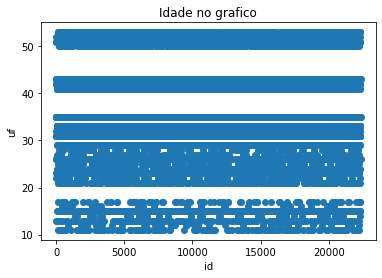

In [85]:
# Import matplotlib
import matplotlib.pyplot as plt
# Create scatter plot
plt.scatter(x = 'id', y = 'uf', data = df)
# Create title, xlabel and ylabel
plt.title('Idade no grafico')
plt.xlabel('id')
plt.ylabel('uf')
# Show plot
plt.show()

In [84]:
indexNames = df[df['uf'] == 99].index
df.drop(indexNames, inplace=True)

### Identifying null values

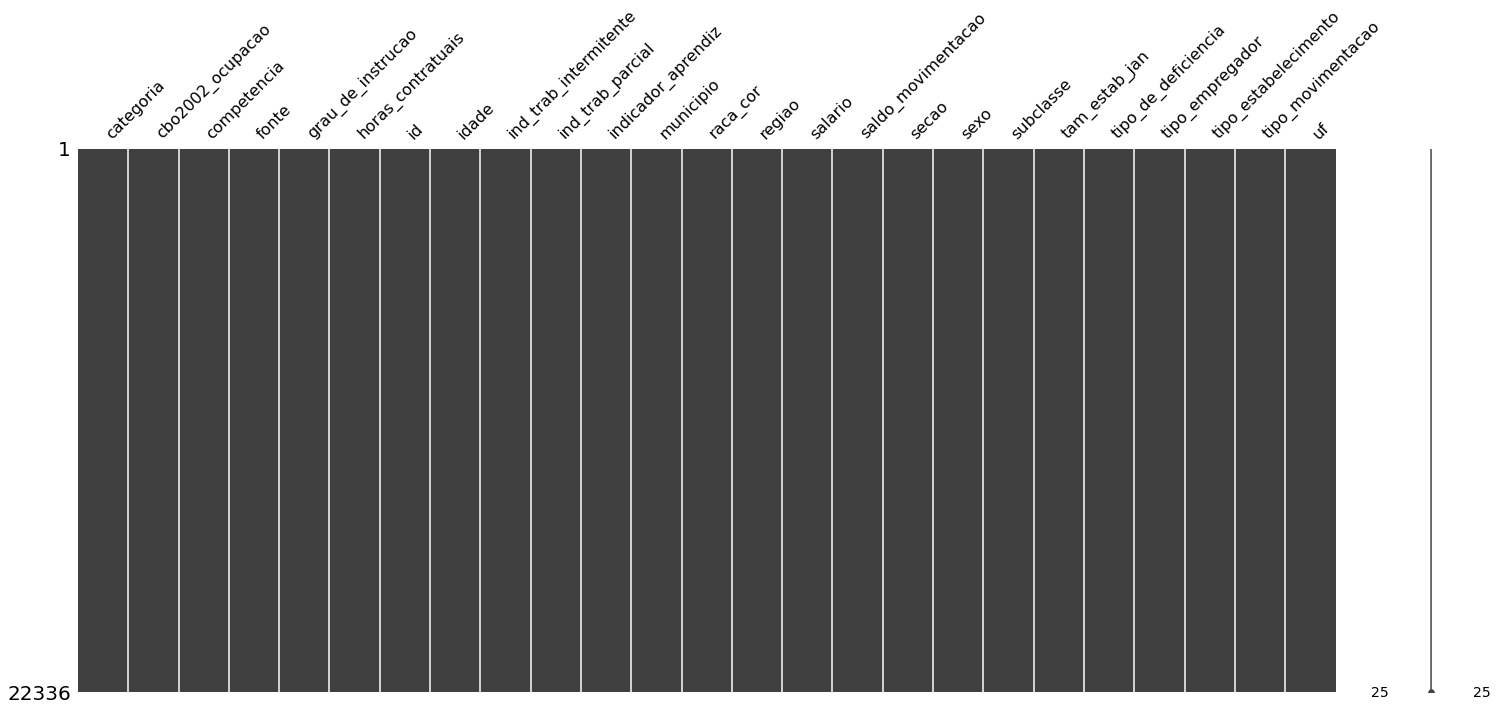

In [25]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
plt.show()

In [ ]:
countNa = df.isna().sum()
countNa

In [ ]:
countNull = df.isnull().sum()

### Transforming df to list to be inserted in table database

In [119]:
df = pd.DataFrame(df)
df = df.values.tolist()
df 


list

## Creating and inserting data into database

#### Creating drop table function 

In [117]:
def droping_table():
    try:
        conn = psycopg2.connect(user='postgres',
                                password='postgres',
                                host = '127.0.0.1',
                                port = '5432',
                                database = 'postgres')
        print(type(conn))
        cur = conn.cursor()
        print(type(cur))
        cur.execute(public_dataset_table_drop)
        conn.commit()
        print("Table dropped successfully in PostgreSQL")

    except (Exception, psycopg2.DatabaseError) as error:
        print('Error while droping PostgreSQL table', error) 

    finally:
        if(conn):
            cur.close()
            conn.close()
            print('PostgreSQL connection is closed')

In [118]:
droping_table()

<class 'psycopg2.extensions.connection'>
<class 'psycopg2.extensions.cursor'>
Table dropped successfully in PostgreSQL
PostgreSQL connection is closed


#### Creating create table function

In [43]:
def creating_table():
    try:
        conn = psycopg2.connect(user='postgres',
                                password='postgres',
                                host = '127.0.0.1',
                                port = '5432',
                                database = 'postgres')
        cur = conn.cursor()
        cur.execute(public_dataset_table_create)
        conn.commit()
        print("Table created successfully in PostgreSQL")

    except (Exception, psycopg2.DatabaseError) as error:
        print('Error while creating PostgreSQL table', error) 

    finally:
        if(conn):
            cur.close()
            conn.close()
            print('PostgreSQL connection is closed')

In [44]:
creating_table()

Table created successfully in PostgreSQL
PostgreSQL connection is closed


#### Creating insert table function

In [45]:
def inserting_data_table():
    try:
        conn = psycopg2.connect(user='postgres',
                        password='postgres',
                        host = '127.0.0.1',
                        port = '5432',
                        database = 'postgres')
        cur = conn.cursor()
        cur.executemany(public_dataset_table_insert, df)
        conn.commit()

        print('Data was inserted sucessfully')
        
    except (Exception, psycopg2.Error) as error:
        print('Error while inserting data:', error)
        
    finally:
        # closing database connection
        if(conn):
            cur.close()
            conn.close()
            print('PostgreSQL connection is closed')

In [46]:
inserting_data_table()

Data was inserted sucessfully
PostgreSQL connection is closed
